# Example usage of Millefy

In [1]:
library(millefy)

Warning message:
“replacing previous import ‘IRanges::shift’ by ‘data.table::shift’ when loading ‘millefy’”Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Warning message:
“replacing previous import ‘IRanges::distance’ by ‘destiny::distance’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::collapse’ by ‘dplyr::collapse’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::union’ by ‘dplyr::union’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::slice’ by ‘dplyr::slice’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::intersect’ by ‘dplyr::intersect’ when loading ‘millefy’”Warning message:
“replacing previous import ‘IRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘millefy’”Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr

## Input files

### BigWig files (scRNA-seq samples)

In [2]:
# Path to bigWig files
bwfiles = Sys.glob(file.path(system.file("extdata", package="millefy"), "*.bw"))
print(bwfiles)

[1] "/opt/conda/lib/R/library/millefy/extdata/RamDA_00h_A06.bw"
[2] "/opt/conda/lib/R/library/millefy/extdata/RamDA_00h_A07.bw"
[3] "/opt/conda/lib/R/library/millefy/extdata/RamDA_00h_A08.bw"
[4] "/opt/conda/lib/R/library/millefy/extdata/RamDA_12h_A06.bw"
[5] "/opt/conda/lib/R/library/millefy/extdata/RamDA_12h_A07.bw"
[6] "/opt/conda/lib/R/library/millefy/extdata/RamDA_12h_A08.bw"


In [3]:
# Group labels for bigWig files (same length as bwfiles)
groups = c("00h", "00h", "00h", "12h", "12h", "12h")

In [4]:
# Color labels for bigWig files (A named vector with the same length as the number of kinds of \\code{groups})
color_labels <- colorRampPalette(c("yellow", "red"))(length(unique(groups))+1)[1:length(unique(groups))]
names(color_labels)  <- unique(groups)
print(color_labels)

      00h       12h 
"#FFFF00" "#FF7F00" 


### GTF file (gene models)

In [5]:
# Load gene models (It takes a little time)
path_gtf = system.file("extdata", "example.gtf", package="millefy")
dt_gtf_exon <- gtfToDtExon(path_gtf)

### Set tracks

In [6]:
# Set tracks
## Single-cell track
max_value = 7000
scTrackBw <- list(path_bam_files = bwfiles, groups = groups, group_colors = color_labels, max_value = max_value, isBw=TRUE)

## Gene annotation track
geneTrack1 <- list(path_gtf = path_gtf, dt_gtf = dt_gtf_exon, label = "GENCODE")


# Prepare arguments for millefyPlot()
## List of tracks
tdlist <- list(scTrackBw, geneTrack1)

## List of track types
tt <- c("sc", "gene")

## List of track hights
heights = c(12, 2)

### Set a location

In [7]:
# Location to visualize
chr =  "chr19" # character
start = 5824708 # integer
end = 5845478 # integer

text_main = "mESC 00h, 12h (Neat1)"

## Plot

### Default
When we don't set the sc_sort_destiny parameter (default), the order of single cells is the order of bwfiles.



[1] "Begin millefyPlot: 2019-12-30 02:19:04"
[1] "title" "sc"    "avg"   "gene"  "axis" 
[1] "Importing BigWig: 2019-12-30 02:19:04"
[1] "Finished millefyPlot: 2019-12-30 02:19:05"


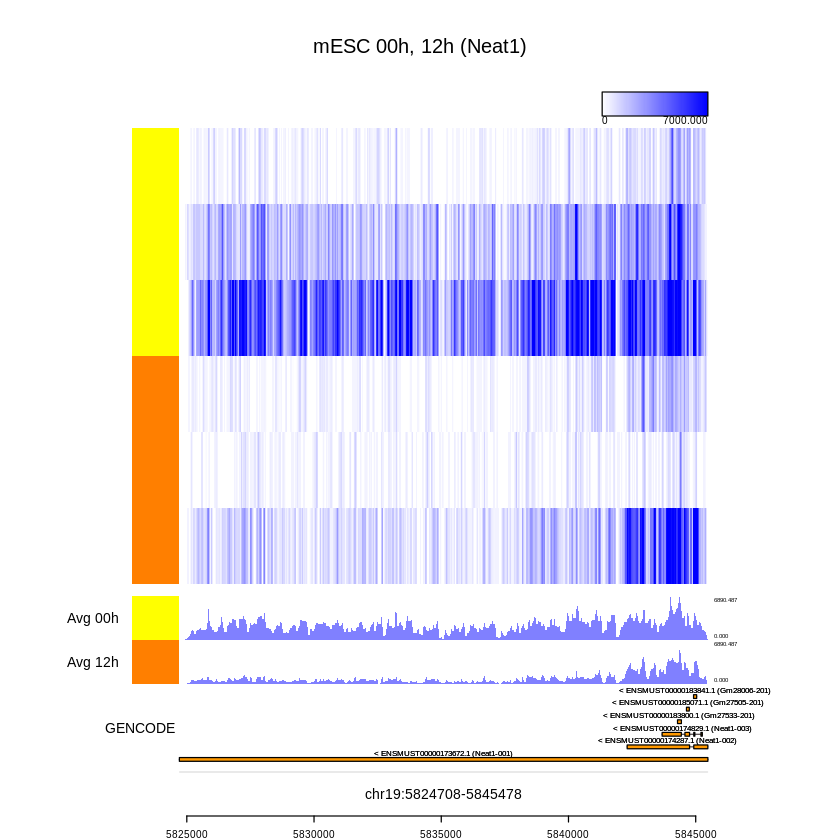

In [8]:
l <- millefyPlot(track_data=tdlist, track_type=tt, heights=heights,
          sc_type = "heatmap",
          chr = chr, start = start, end = end,
          sc_avg = TRUE, sc_avg_height = 1,
          title = text_main)

### Replot ('all-cell' mode)
When we set sc_sort_destiny = 'all', all single cells are reordered by diffusion maps.

[1] "Begin millefyPlot: 2019-12-30 02:19:05"
[1] "title" "sc"    "avg"   "gene"  "axis" 


Warning message in DiffusionMap(as.ExpressionSet(as.data.frame(mat))):
“You have 990 genes. Consider passing e.g. n_pcs = 50 to speed up computation.”

Eigenvalue of DC1: 0.274219
[1] "Finished millefyPlot: 2019-12-30 02:19:06"


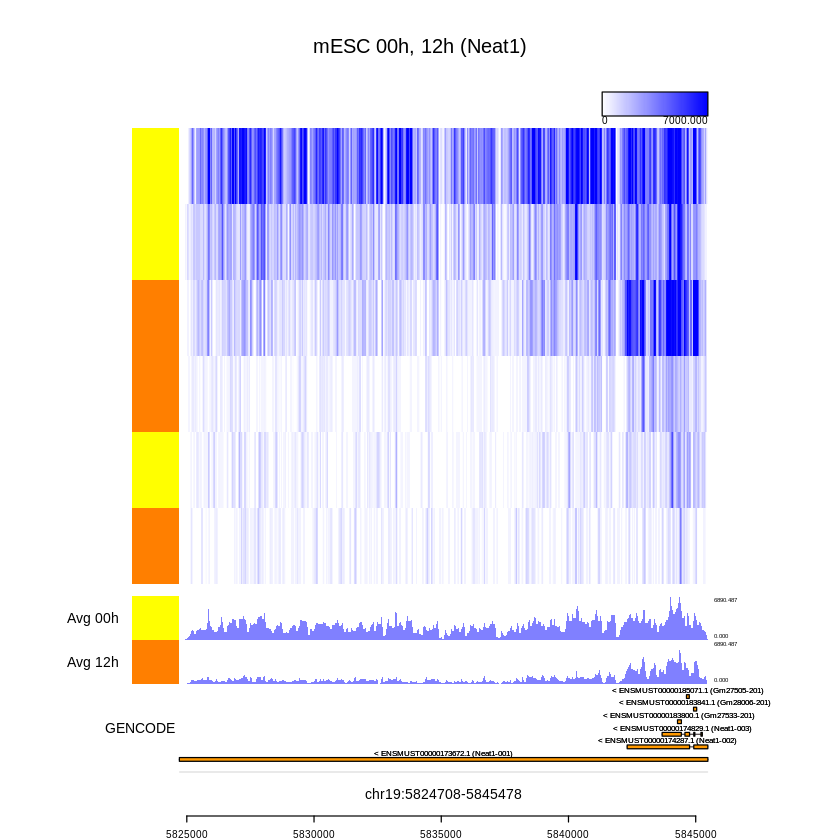

In [9]:
millefy_adjust(sc_sort_destiny = 'all')

### Replot ('group-wise' mode)
When we set sc_sort_destiny = 'group', all single cells in each group are reordered by diffusion maps.

[1] "Begin millefyPlot: 2019-12-30 02:19:07"
[1] "title" "sc"    "avg"   "gene"  "axis" 


Warning message in DiffusionMap(as.ExpressionSet(as.data.frame(mat))):
“You have 990 genes. Consider passing e.g. n_pcs = 50 to speed up computation.”

Eigenvalue of DC1: 0.274219
[1] "Finished millefyPlot: 2019-12-30 02:19:08"


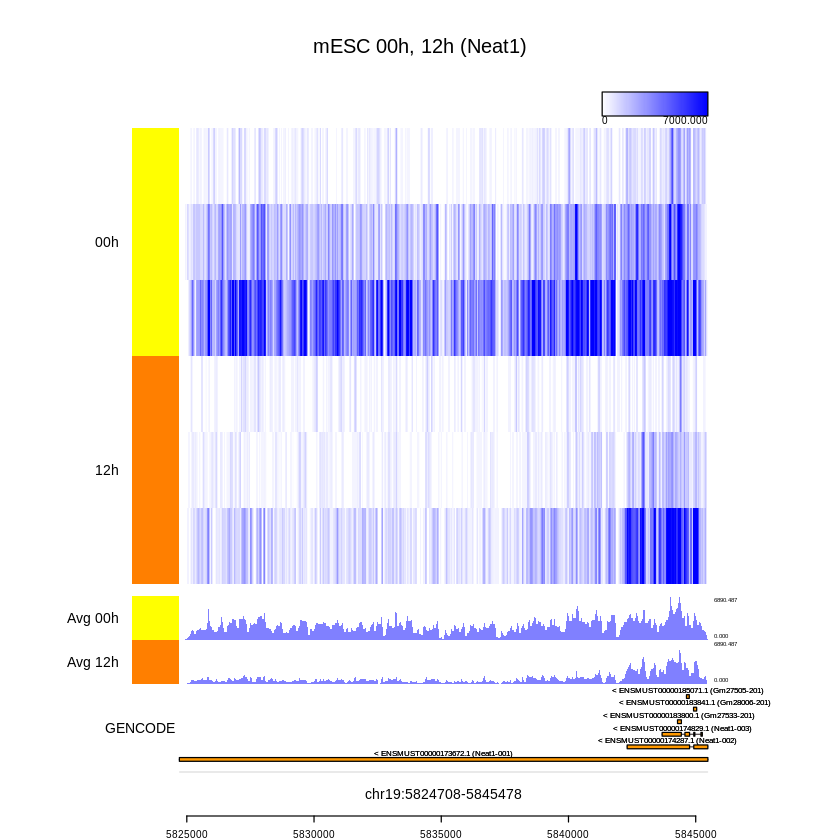

In [10]:
millefy_adjust(sc_sort_destiny = 'group')

### Replot (Change scale of averaged single-cell read coverage track)
Using `sc_avg_scale`, you can change the scale of the averaged single-cell read coverage tracks

[1] "Begin millefyPlot: 2019-12-30 02:19:08"
[1] "title" "sc"    "avg"   "gene"  "axis" 
[1] "Finished millefyPlot: 2019-12-30 02:19:08"


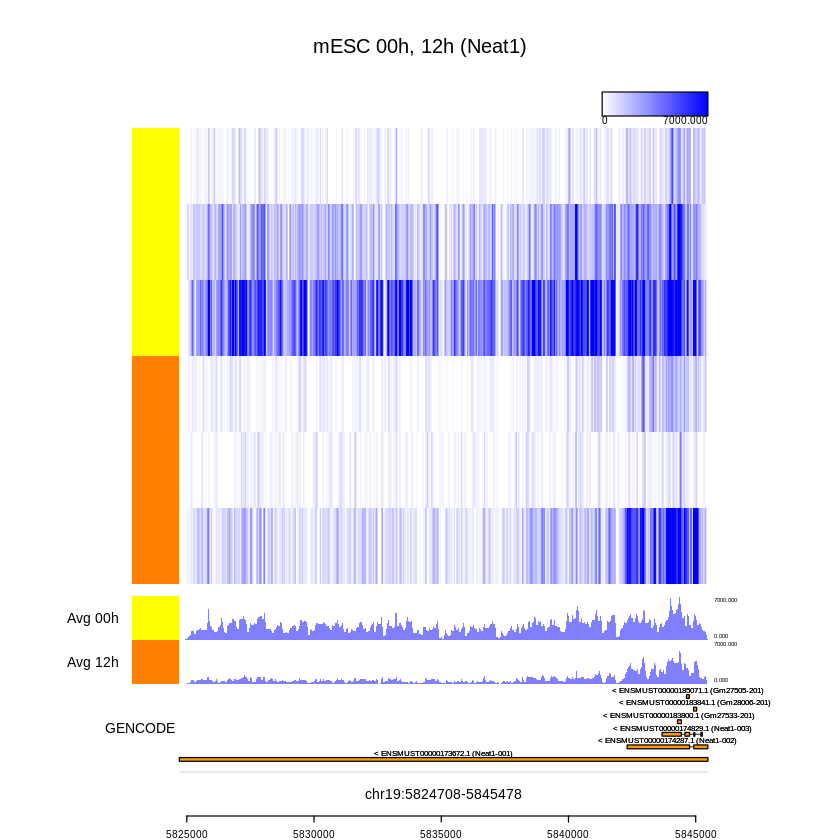

In [11]:
millefy_adjust(sc_avg_scale = 7000)

## sessionInfo

In [12]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] millefy_0.1.9

loaded via a namespace (and not attached):
  [1] bitops_1.0-6                matrixStats_0.55.0         
  [3] destiny_3.0.0               xts_0.11-2                 
  [5] GenomeInfoDb_1.22.0         repr_1.0.1                 
  [7] tools_3.6.1                 backports_1.1.5            
  [9] irlba_2.3.3                 R6_2.4.1                   
 [11] BiocGenerics_0.32.0         lazyeval_0.2.2             
 [13] colorspace_1.4-1            nnet_7.3-12                
 [15] sp_1.3-2                    smoother_1.1               
 [17] tidyselect_0.2.5            curl_4.2                   
 [19] compiler_3.6.1              Biobase_2.46.0